# [DS4Bio] Week 1 Lab: Introduction - Genome Sizes (Data C8 Review)

**Notebook developed by:**
*Reet Mishra*, *Sarp Dora Kurtoglu* and *Kinsey Long* (adapted in part from work by *Shishi Luo* and *Jonathan Fischer*)

**Supervised by:** *Steven E. Brenner*

### Learning Outcomes
This lab is intended to be a light review of essential coding concepts needed for this course. 
We strongly encourage you to review the other [Data C8 methods](http://data8.org/sp22/python-reference.html) from the `datascience` package that are not included in this notebook that will be applied in future assignments.

In this notebook, you will review Data C8 methods from the `datascience` package, including:
* Importing and analyzing datasets
* Sorting and manipulating scientific data
* Building functions
* Creating bar charts, histograms, scatterplots
***

### Resources
Here are some resources you can check out while doing this notebook.

- [Data C8 Reference Sheet](http://data8.org/sp22/python-reference.html)<br>(This is extremely helpful whenever you need a cheatsheet. It includes all the methods you will need for this notebook.)
- [Official documentation for the datascience Module](http://data8.org/datascience/index.html)
- [The C-value Paradox](https://www.sciencedirect.com/topics/neuroscience/c-value)

### Peer Consulting

If you find yourself having trouble with any content in this notebook, Data Peer Consultants are an excellent resource! Click [here](https://cdss.berkeley.edu/dsus/advising/data-science-peer-advising-dspa) to locate live help.

Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world, or other data science courses offered at Berkeley.

---

## 1. Genome Size Exploration

In this section, we will review Data C8 `datascience` methods in order to explore the genome sizes of 15 different species. These questions are intended to guide students to gather and interpret useful information from tabular data. 

To prepare our notebook environment, run the following cell which imports the necessary packages.

We are importing:
- All methods from the Data C8 `datascience` package.
- `matplotlib.pyplot` for visualization methods.
- `numpy` for basic arrays methods.
- `scipy.stats` for additional statistical methods.

The cell will print `'All necessary packages have been imported.'` when it's completed importing.

In [2]:
# Import the necessary packages
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import scipy.stats as sp
print("All necessary packages have been imported.")

All necessary packages have been imported.


The **genome size** is the amount of DNA contained in one copy of the complete genome, in terms of the number of basepairs.

The table that we are importing contains information on 15 different species. The table provides both the scientific and common name of these species, as well as the number of genes, the number of proteins, and the genome size for the species.


<font color = #d14d0f>**QUESTION 1**:</font> First, import the model species data as a Table. Then, display the full table using `table.show()` from the `datascience` package. Replace the `...` in the skeleton code below, and use `table.show()` on the `species` table.

>  Note: The `Table.read_table(filepath)` method requires a filepath as a string, which should be formatted like `"folder/file_name"`. The csv file we want to import is `"lab0_model_species.csv"`, which is located inside the `"data"` folder. 


In [3]:
# YOUR CODE HERE
species = Table.read_table("./data/intro_model_species.csv")
species.show()

Scientific name,Common name,Genes,Proteins,Size
Escherichia coli,E. coli,5618,5358,5478680
Arabidopsis thaliana,A. thaliana,33583,35378,119668000
Caenorhabditis elegans,C. elegans,46711,27943,100286000
Danio rerio,Zebrafish,39803,47861,1371720000
Drosophila melanogaster,Fruit fly,17651,30443,143726000
Gallus gallus,Chicken,25062,46393,1230260000
Mus musculus,Mouse,48855,78065,2803570000
Saccharomyces cerevisiae S288c,Yeast,6350,5907,12157100
Rattus norvegicus,Rat,37647,50706,2870180000
Zea mays,Corn (maize),104305,116015,2067620000


<font color = #d14d0f>**QUESTION 2**:</font> How many organisms does the `species` Table contain?

>*Hint:*<br>- What datascience method can we use to count the number of rows in the `species` table? Remember that you can refer to the [Data C8 Reference Sheet](http://data8.org/sp22/python-reference.html).
<br>- Note, throughout this assignment, we will treat viruses as an organism and/or species.

In [4]:
# YOUR CODE HERE
num_organisms = species.num_rows

# DO NOT CHANGE THIS CODE
print(f"There are {num_organisms} organisms in the species table.")

There are 15 organisms in the species table.


<font color = #d14d0f>**QUESTION 3a**: </font> We want to explore data in the `genes` column. Use a table method from the Data 8 table methods to extract a copy of the values from the `'Genes'` column as an array. Assign your result to the variable `genes_array`.

In [5]:
# YOUR CODE HERE
genes_array = species.column('Genes')
genes_array

array([  5618,  33583,  46711,  39803,  17651,  25062,  48855,   6350,
        37647, 104305,  66100,  30186,     12,     10,  27613])

<font color = #d14d0f>**QUESTION 3b**: </font> Now, let's apply some array functions on our `genes_array`. Fill out the code below to calculate the number of elements (length), mean, max, min, and standard deviation of the array using `numpy` methods.

>*Hint:*<br>- Array methods are formatted as `method(array)`.  <br>- All the `np` methods you need for this are described in the [Data C8 Reference Sheet](http://data8.org/sp22/python-reference.html)
<br>- Mean, median and standard deviation are described in more detail in section 2, Summary Statistics & Functions.

In [6]:
# YOUR CODE HERE
genes_len = len(genes_array)
genes_mean = np.mean(genes_array)
genes_max = max(genes_array)
genes_min = min(genes_array)
genes_std = np.std(genes_array)

In [7]:
# JUST RUN THIS CELL
print(f"""Species genes summary statistics:
Length - {genes_len}
Mean - {genes_mean}
Max - {genes_max}
Min - {genes_min}
Standard Deviation - {genes_std}
""")

Species genes summary statistics:
Length - 15
Mean - 32633.733333333334
Max - 104305
Min - 10
Standard Deviation - 26655.42507249801



Now that we have looked at a broad overview of summary statistics about the species genes, let's see how we can manipulate the `species` table to tell us some more specific information.

<font color = #d14d0f>**QUESTION 4**: </font> Use a table method to produce a sorted version of the `species` table by **genome size** (the column `"Size"`) in descending order (largest to smallest), and assign the sorted table to the variable `species_sorted_sizes`.

>*Hint:*<br>- You may need to adjust an optional parameter in a table method.

In [8]:
# YOUR CODE HERE
species_sorted_sizes = species.sort('Size', descending=True)

# DO NOT CHANGE THIS CODE
species_sorted_sizes.show()

Scientific name,Common name,Genes,Proteins,Size
Rattus norvegicus,Rat,37647,50706,2870180000
Mus musculus,Mouse,48855,78065,2803570000
Canis lupus familiaris,Dog,30186,47089,2410980000
Ailuropoda melanoleuca,Giant panda,27613,32507,2299510000
Zea mays,Corn (maize),104305,116015,2067620000
Danio rerio,Zebrafish,39803,47861,1371720000
Gallus gallus,Chicken,25062,46393,1230260000
Oryza sativa Japonica Group,Rice,66100,81951,374423000
Drosophila melanogaster,Fruit fly,17651,30443,143726000
Arabidopsis thaliana,A. thaliana,33583,35378,119668000


<font color = #d14d0f>**QUESTION 5**: </font> How many species have a genome size greater than 1,000,000,000? 

>*Hint:*
<br>- First, create a filtered table using `table.where(column_label, predicate)`. Then, count the number of rows in the new table.
<br>- All `Table.where` predicates can be found at [this link](https://www.data8.org/fa23/reference/#tablewhere-predicates). 

In [9]:
# YOUR CODE HERE
filtered_species_tbl = species.where("Size", are.above(1000000000))
number_species_above_1000000000 = filtered_species_tbl.num_rows

# DO NOT CHANGE THIS CODE
print(f"There are {number_species_above_1000000000} species that have a genome size above 1,000,000,000.")

There are 7 species that have a genome size above 1,000,000,000.


If we wanted to extract the name of the species with the fewest genes, we can follow the steps below.
<br> Just run the next few cells and follow along with the commented lines.

In [10]:
# 1: Sort table in ascending order of number of genes
ascending_number_of_genes = species.sort("Genes")
ascending_number_of_genes.show() # Display the Table

Scientific name,Common name,Genes,Proteins,Size
Human immunodeficiency virus 1,HIV,10,10,9181
Influenza A virus (A/New York/392/2004(H3N2)),Influenza,12,12,13627
Escherichia coli,E. coli,5618,5358,5478680
Saccharomyces cerevisiae S288c,Yeast,6350,5907,12157100
Drosophila melanogaster,Fruit fly,17651,30443,143726000
Gallus gallus,Chicken,25062,46393,1230260000
Ailuropoda melanoleuca,Giant panda,27613,32507,2299510000
Canis lupus familiaris,Dog,30186,47089,2410980000
Arabidopsis thaliana,A. thaliana,33583,35378,119668000
Rattus norvegicus,Rat,37647,50706,2870180000


In [11]:
# 2: Extract the column "Common name" as an array
common_names_sorted = ascending_number_of_genes.column("Common name")
common_names_sorted # Show the array

array(['HIV', 'Influenza', 'E. coli', 'Yeast', 'Fruit fly', 'Chicken',
       'Giant panda', 'Dog', 'A. thaliana', 'Rat', 'Zebrafish',
       'C. elegans', 'Mouse', 'Rice', 'Corn (maize)'],
      dtype='<U12')

In [12]:
# 3: Extract the first item of the array
# Remember that the first item will be index number 0, the second item will be index number 1, and so on.
fewest_gene_species = common_names_sorted.item(0)

print(f"Method 1: The species with the smallest number of genes is {fewest_gene_species}.") # Print statement with formatted variable.

Method 1: The species with the smallest number of genes is HIV.


In [13]:
#Y ou could also combine all three steps together, like so:
fewest_gene_species = species.sort("Genes").column("Common name").item(0)
# The code will execute consecutive methods in order from left to right.
print(f"Method 2: The species with the smallest number of genes  is {fewest_gene_species}.")

Method 2: The species with the smallest number of genes  is HIV.


<font color = #d14d0f>**QUESTION 6a**: </font> Following the same steps as above, determine the scientific name of the species with the largest number of genes and assign it to the variable `most_genes_species`.

>*Note:* You do not have to follow the skeleton code below if you want to combine steps, as shown in the example above. However, your final answer must be assigned to the variable `most_genes_species`.

In [14]:
# YOUR CODE HERE
genes_sorted = species.sort("Genes", descending=True)
scientific_names_sorted = genes_sorted.column("Scientific name")
most_genes_species = scientific_names_sorted.item(0)

#DO NOT CHANGE THIS CODE
print(f"The scientific name of the species with the most number of genes is {most_genes_species}.")

The scientific name of the species with the most number of genes is Zea mays.


<font color = #d14d0f>**QUESTION 6b**: </font> What is the common name for the species with the largest number of genes?

In [15]:
# YOUR CODE HERE
#Feel free to create additional variables if needed
most_genes_species_common_name = genes_sorted.column("Common name").item(0)

#DO NOT CHANGE THIS CODE
print(f"The common name of the species with the most number of genes is {most_genes_species_common_name}.")

The common name of the species with the most number of genes is Corn (maize).


<font color = #d14d0f>**QUESTION 7**: </font> Create a table `species_gene_sizes` with only two columns for `"Common name"` and `"Size"`, which is sorted by genome size in descending order.

In [16]:
# YOUR CODE HERE
# Feel free to create additional variables as needed, but make sure your final table is assigned to species_gene_sizes.
species_gene_sizes = species.select("Common name", "Size").sort("Size", descending=True)

# DO NOT CHANGE THIS CODE
species_gene_sizes.show()

Common name,Size
Rat,2870180000
Mouse,2803570000
Dog,2410980000
Giant panda,2299510000
Corn (maize),2067620000
Zebrafish,1371720000
Chicken,1230260000
Rice,374423000
Fruit fly,143726000
A. thaliana,119668000


<font color = #d14d0f>**QUESTION 8**: </font> Using the table from Question 7, does there appear to be a relationship between the complexity of an organism and its genome size? Use data from the table above to justify your reasoning. Limit your answer to three sentences.
> Hint: Refer back to the links from [Resources](###Resources).

**ANSWER:** There doesn't appear to be a relationship between the complexity of an organism and its genome sized based on the above data. A chicken is arguably a more complex organism than a corn yet the corn has a greater genome size. This is due to a concept known as the C-value paradox which states that there is a lack of correlation between biological complexity and intuitively expected protein-coding genomic information or DNA content

---

## 2. Summary Statistics & Functions

Summary statistics are numerical measures used to describe and summarize essential characteristics or properties of a dataset. They provide a concise overview of the dataset's central tendency, spread, and key features.

All of the summary statistics below can be accessed using the `numpy` package (often abbreviated as `np`). Throughout this section, we are defining these four statistics as summary statistics.

>#### **Mean:**
The mean, often called the average, is calculated by summing all values in a dataset and dividing by the number of data points. It represents the arithmetic center of the data.<br>
Use Case: The mean is useful for continuous data when you want to find the typical or central value. However, it can be sensitive to outliers, making it less suitable when extreme values are present. <br>
Code: `np.mean(array)`
>#### **Median:**
The median is the middle value in a dataset when it is ordered. If there is an even number of data points, it's the average of the two middle values. The median is less sensitive to outliers compared to the mean.<br>
Use Case: The median is preferred when dealing with skewed or non-normally distributed data, as it provides a more robust measure of central tendency.<br>
Code: `np.median(array)`
>#### **Standard Deviation:**
The standard deviation quantifies the amount of variation or dispersion in a dataset. It measures how individual data points deviate from the mean.<br>
Use Case: The standard deviation is useful for understanding the spread or variability in a dataset. A higher standard deviation indicates greater variability, making it valuable for assessing data consistency.<br>
Code: `np.std(array)`
>#### **Interquartile Range (IQR):**
The IQR is a measure of statistical dispersion, specifically the range between the first quartile (Q1) and the third quartile (Q3). It identifies the middle 50% of the data.<br>
Use Case: The IQR is robust against outliers and is often used to identify and handle extreme values. It's valuable for describing the spread of data while minimizing the influence of outliers.<br>
Code: `sp.iqr(array)`

<font color = #d14d0f>**QUESTION 1a**: </font> We want to create summary statistics for the `species` table. Fill in the function below that takes an array of numerical values and returns a list of summary statistics for that array.
> Hint: You may want to refer to Part 1 Q3b.

In [17]:
def generate_summary_statistics(array):
    mean = np.mean(array)
    median = np.median(array)
    std = np.std(array)
    iqr = np.percentile(array, 75) - np.percentile(array, 25)
    return [mean, median, std, iqr]



<font color = #d14d0f>**QUESTION 1b**: </font> Fill in the code below using the `generate_summary_statistics_function` to create a list of summary statistics for three of the columns in `species`: `"Size"`, `"Genes"` and `"Proteins"`. 
>*Hint:* Remember that `generate_summary_statistics_function` takes in an **array**.

In [18]:
# YOUR CODE HERE
species_size_summary_statistics = generate_summary_statistics(species.column("Size"))
species_genes_summary_statistics = generate_summary_statistics(species.column("Genes"))
species_proteins_summary_statistics = generate_summary_statistics(species.column("Proteins"))

# DO NOT CHANGE THIS CODE: This code formats your results into a table called `species_summary`.
species_summary = Table().with_columns(["Summary statistic", ["Mean", "Median", "Standard Deviation", "Interquartile Range"]])
species_summary = species_summary.with_columns(["Genome size", species_size_summary_statistics, "Genes", species_genes_summary_statistics, "Proteins", species_proteins_summary_statistics])
species_summary

Summary statistic,Genome size,Genes,Proteins
Mean,1.05397e+09,32633.7,40375.9
Median,3.74423e+08,30186,35378
Standard Deviation,1.10729e+09,26655.4,31756.8
Interquartile Range,2.12734e+09,31256.5,32358.5


<font color = #d14d0f>**QUESTION 2**: </font> Fill in the code below to create a function that takes in a Table that has columns for `'Size'`, `'Genes'` and `'Proteins'` and outputs a table summary (similar to the table shown in Question 1b) with summary statistics for those columns. 

In [ ]:
# YOUR CODE HERE
def summary_statistics_table(tbl):
    size_summary_statistics = generate_summary_statistics(tbl.column("Size"))
    genes_summary_statistics = generate_summary_statistics(tbl.column("Genes"))
    proteins_summary_statistics = generate_summary_statistics(tbl.column("Proteins"))
    #DO NOT CHANGE THIS CODE
    tbl_summary = Table().with_columns(["Summary statistic", ["Mean", "Median", "Standard Deviation", "Interquartile Range"]])
    tbl_summary = species_summary.with_columns(["Genome size", size_summary_statistics, "Genes", genes_summary_statistics, "Proteins", proteins_summary_statistics])
    return tbl_summary

#You can check your code by running it on the species table. Does it look like the table in Question 1b?
summary_statistics_table(species)

#You can check your code by running it on the species table. Does it look like the table in Question 1b?
summary_statistics_table(species)



Summary statistic,Genome size,Genes,Proteins
Mean,1.05397e+09,32633.7,40375.9
Median,3.74423e+08,30186,35378
Standard Deviation,1.10729e+09,26655.4,31756.8
Interquartile Range,2.12734e+09,31256.5,32358.5


---

## 3. Visualizations

In this class, we will often be using the `matplotlib` package for creating visualizations. The format for generating any kind of visualization will generally be in the format of `plt<method>(<data>)`. You can explore all of the different `matplotlib` plots and how to use them at [this link](https://matplotlib.org/stable/plot_types/index.html). We will primarily be using bar charts, histograms and scatter plots.

<font color = #d14d0f>**QUESTION 1**: </font> Import the pathogen data as a table and assign it to a variable `pathogens`. The *csv* file that we will turn into a table is called `'lab0_pathogens.csv'`, which is in the `'data'` folder.

In [ ]:
# YOUR CODE HERE
pathogens = Table.read_table("./data/intro_pathogens.csv")
pathogens.show()

Scientific name,Description,Subgroup,Size,Genes,Proteins
Yersina pestis,Plague,Bacteria,4.93,4773,4390
Mycobacterium tuberculosis,Tuberculosis,Bacteria,4.41,4300,4128
Escherichia coli,E. coli,Bacteria,5.1,5084,4721
Helicobacter pylori,H. pylori,Bacteria,1.6,1587,1545
Bacillus anthracis,Anthrax,Bacteria,5.49,5804,5299
Clostridium tetani,Tetanus,Bacteria,2.81,2740,2624
Bordetella pertussis,Whooping cough,Bacteria,4.1,3987,3574
Staphylococcus aureus,Staph infection,Bacteria,2.98,3115,2944
Streptococcus pyogenes,Strep throat,Bacteria,1.91,2008,1860
Vibrio cholerae,Cholera,Bacteria,4.36,4099,3808


Bar charts can be used to compare values in categorical data. For more information on bar charts, feel free to refer to the [Data 8 textbook](https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html). 

<font color = #d14d0f>**QUESTION 2a**:</font> We want to create a bar chart of subgroup counts. First, create a table showing the number of pathogens in each subgroup and assign it to subgroup_counts. It should have two columns `Subgroup` and `count`.
>*Hint:* Check out the `Table.group()` method.

In [21]:
# YOUR CODE HERE
subgroup_counts = pathogens.group("Subgroup")
subgroup_counts.show()

Subgroup,count
Bacteria,10
Fungus,7
Parasite,7
Virus,8


<font color = #d14d0f>**QUESTION 2b**: </font> Now, use the table `subgroup_counts` to create a bar chart using `plt.bar(<x_values>, <y_values>)`. 
>*Hint:*<br>- The x_values and y_values should be arrays containing data extracted from the `subgroup_counts` table.

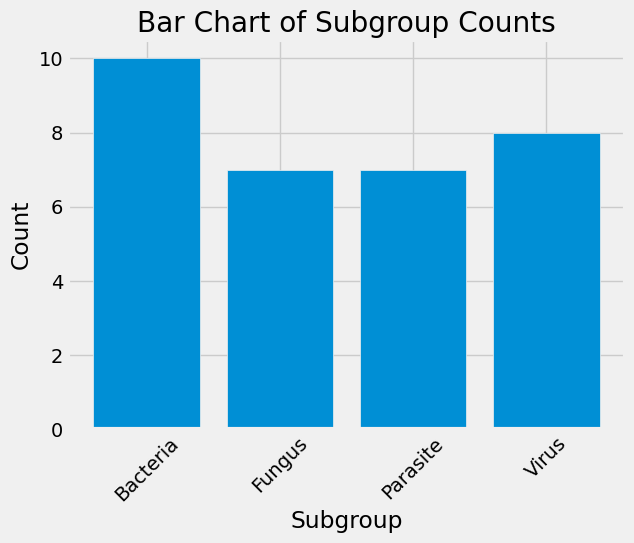

In [22]:
# YOUR CODE HERE
subgroup_names = subgroup_counts.column("Subgroup")
subgroup_counts = subgroup_counts.column("count")
plt.bar(subgroup_names, subgroup_counts)


# DO NOT CHANGE THIS CODE
plt.xlabel('Subgroup')
plt.ylabel('Count')
plt.title('Bar Chart of Subgroup Counts')
plt.xticks(rotation=45)
plt.show()

Now, we we will be looking at histograms. Histograms are used to show the distribution of a numerical variable. Feel free to review the concept of histograms from the [Data 8 Textbook](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html).

<font color = #d14d0f>**QUESTION 3**: </font> In the code cell below, create a histogram of genome sizes (in megabases) from the pathogens table.
>*Hint:<br>* Use the following format `<table_name>.hist('column_name', bins = b, normed = n)` where<br>- b gives the number of bins in the histogram<br>- n is either True or False for whether bin heights should be normalized by number of observations<br>- Choose 20 bins and normed = True.


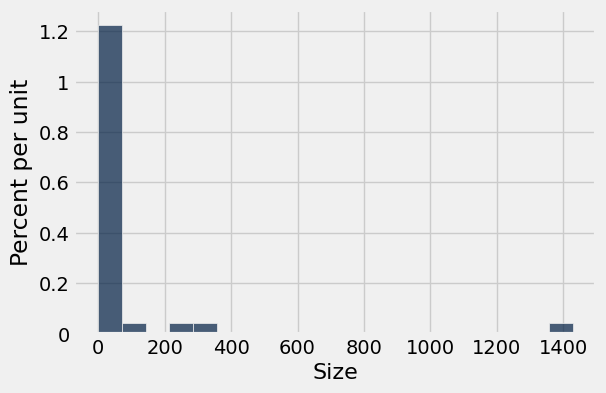

In [23]:
# YOUR CODE HERE
genome_size_hist = pathogens.hist("Size", bins=20, normed=True)
genome_size_hist

<font color = #d14d0f>**QUESTION 4**: </font> Create a scatterplot of the genome size (x-axis) vs the number of genes (y-axis) in `pathogens` using the `matplotlib` package.

>*Hint:*<br>- The format for a `matplotlib` scatterplot is `plt.scatter(<x_values_array>, <y_values_array>)`

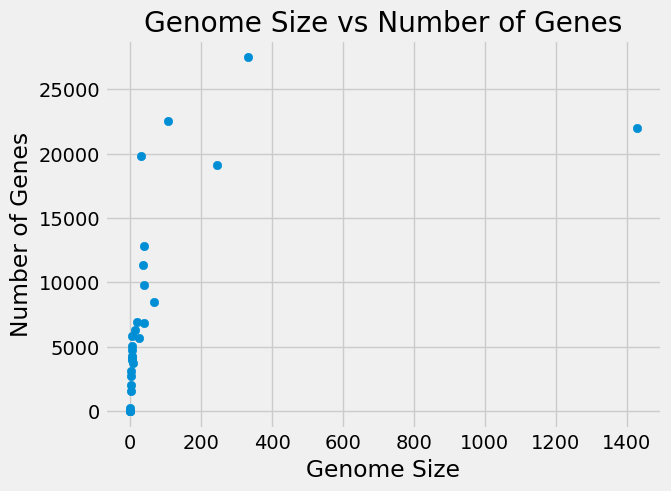

In [24]:
# YOUR CODE HERE
genome_sizes_pathogens = pathogens.column("Size")
num_genes_pathogens =  pathogens.column("Genes")
plt.scatter(genome_sizes_pathogens, num_genes_pathogens)

#DO NOT CHANGE THIS CODE
plt.title("Genome Size vs Number of Genes")
plt.xlabel("Genome Size")
plt.ylabel("Number of Genes")
plt.show()

---

## 4. Putting it All Together

We are going to combine the skills we have practiced to explore the `animals` table.

<font color = #d14d0f>**QUESTION 1**: </font> Import the csv file with the path `data/lab0_animals.csv` into a Table called `animals`. Then, display the Table.

In [25]:
# YOUR CODE HERE
animals = Table.read_table("./data/intro_animals.csv")
animals.show()

Scientific name,Description,Subgroup,Size,Genes,Proteins
Drosophila yakuba,African fruit fly,Insects,165.71,16079,23317
Homo sapiens,Human,Mammals,3231.3,56201,102633
Anopheles gambiae,Mosquito,Insects,265.027,13184,14099
Drosophila melanogaster,Common fruit fly,Insects,143.726,17651,30443
Apis mellifera,Western honey bee,Insects,250.287,13401,21777
Danio rerio,Zebrafish,Fishes,1371.72,39803,47861
Mus musculus,House mouse,Mammals,2803.57,48855,78065
Takifugu rubripes,Japanese puffer,Fishes,391.485,23164,31052
Rattus norvegicus,Rat,Mammals,2870.18,37647,50706
Felis catus,Domestic cat,Mammals,2641.34,25364,33226


<font color = #d14d0f>**QUESTION 2**: </font> Build a function `smallest` that takes in a column label (String) from the `animals` Table. It should return the scientific name of the animal (as a string) with the smallest quantity of the input column label. Then, call the function on each of the three quantitative variable columns in `animals`.
> For example, `smallest("Size")` returns the scientific name of the animal with the smallest genome size which is `"Drosophila simulans"`. <br>
> You do not have to follow the skeleton code if you do not wish.

In [26]:
# YOUR CODE HERE
def smallest(column_label):
    sorted_by_col = animals.sort(column_label)
    smallest_value = sorted_by_col.column("Scientific name").item(0)
    return smallest_value

smallest_size = smallest("Size")
smallest_genes = smallest("Genes")
smallest_proteins = smallest("Proteins")

#DO NOT CHANGE THIS CODE 
print(f"The animal with the smallest genome size is {smallest_size}.")
print(f"The animal with the smallest number of genes is {smallest_genes}.")
print(f"The animal with the smallest number of proteins is {smallest_proteins}.")

The animal with the smallest genome size is Drosophila simulans.
The animal with the smallest number of genes is Pan paniscus.
The animal with the smallest number of proteins is Salmo salar.


<font color = #d14d0f>**QUESTION 3**: </font> What is the scientific name of the **bird** with the largest genome size? Store your answer as a string in the variable `largest_genome_size_bird`.

In [27]:
# YOUR CODE HERE
def largest(column_label):
    sorted_by_col = animals.sort(column_label, descending=True)
    largest_value = sorted_by_col.column("Scientific name").item(0)
    return largest_value
largest_genome_size_bird =largest("Size")

#DO NOT CHANGE THIS CODE
print(f"The bird with the largest genome size is called {largest_genome_size_bird}.")

The bird with the largest genome size is called Monodelphis domestica.


<font color = #d14d0f>**QUESTION 4**: </font> Fill in the template code below to determine which subgroup has the largest mean genome size, and the corresponding mean genome size of that subgroup. Store your respective answers in `largest_genome_size_subgroup` and `largest_mean_genome_size`.
>*Hint:*<br>- The `tbl.group()` method from the `datascience` package also accepts an optional grouping function as a parameter. Feel free to review the [Data C8 Reference Sheet](http://data8.org/sp22/python-reference.html).

In [28]:
# YOUR CODE HERE
animal_subgroup_means = animals.group("Subgroup", np.mean).select("Subgroup", "Size mean")
subgroups_sorted = animal_subgroup_means.sort("Size mean", descending=True)

largest_genome_size_subgroup = subgroups_sorted.column("Subgroup").item(0)
largest_mean_genome_size = subgroups_sorted.column("Size mean").item(0)

#DO NOT CHANGE THIS CODE
print(f"The subgroup with the largest mean genome size is {largest_genome_size_subgroup}, with a mean genome size of {np.round(largest_mean_genome_size, 1)}. ")

The subgroup with the largest mean genome size is Mammals, with a mean genome size of 2860.5. 


--- 

## 5. Data C8 Statistical Methods Review

**Scatter Plots and Correlation**

<font color = #d14d0f>**QUESTION 1a**: </font> Create a function `z_score` that will convert an input array into z-scores. 


>*Note*: Data C8 calls z-scores "standard units", which are the standard deviation of the data point from the mean. These are unitless measurements describing a data point's relationship to the mean of the sample. <br>
>*Hint:* Check the standard units section of the [Data 8 textbook](https://inferentialthinking.com/chapters/14/2/Variability.html?highlight=standard_units#standard-units) or this section from [Stat 21](https://www.stat.berkeley.edu/~stark/SticiGui/Text/computeR.htm#:~:text=Standard%20units%20are%20a%20way,the%20mean%20of%20the%20data.).

In [29]:
# YOUR CODE HERE
def z_score(array):
    return (array - np.mean(array)) / np.std(array)

<font color = #d14d0f>**QUESTION 1b**: </font> Fill in the function `correlation` that will calculate the Pearson correlation coefficient between an inputted `x_array` and `y_array`.

>*Hint:*<br>- The Pearson correlation coefficient is the mean product of each x and y z-score. <br>- You may want to use the function you created in the previous question. <br>- Check the correlation chapter of the [Data 8 textbook](https://inferentialthinking.com/chapters/15/1/Correlation.html#the-correlation-function). 

In [30]:
# YOUR CODE HERE
def correlation(x_array, y_array):
    return np.mean(z_score(x_array) * z_score(y_array))

<font color = #d14d0f>**QUESTION 1c**: </font> Assign the array of values in the `'Genes'` column of `animals` to `num_genes_animals`. Assign the array of values in the `'Proteins'` column of `animals` to `num_proteins_animals`. Then, calculate the correlation coefficient between the two arrays, and assign your result to `animals_genes_proteins_correlation`.

In [31]:
# YOUR CODE HERE
num_genes_animals = animals.column("Genes")
num_proteins_animals = animals.column("Proteins")
animals_genes_proteins_correlation = correlation(num_genes_animals, num_proteins_animals)

print(f"The Pearson correlation coefficient between animal gene count and protein count is {np.round(animals_genes_proteins_correlation,2)}.")

The Pearson correlation coefficient between animal gene count and protein count is 0.93.


<font color = #d14d0f>**QUESTION 1d**: </font> Generate a scatterplot showing the relationship between animal gene count (x-axis) and protein count (y-axis).

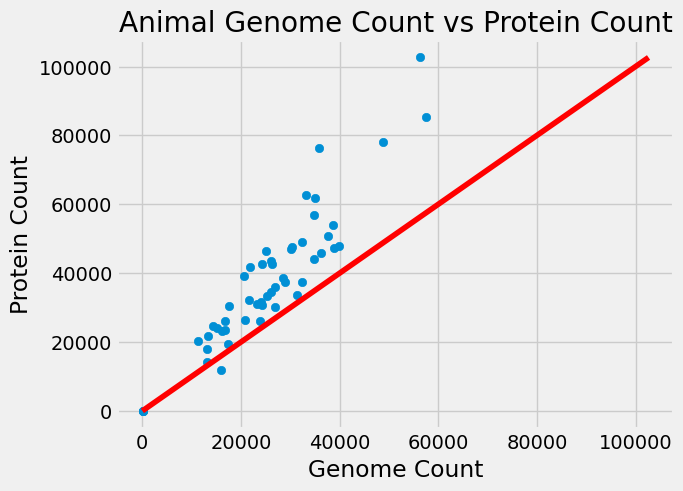

In [32]:
# YOUR CODE HERE
plt.scatter(num_genes_animals, num_proteins_animals)


# DO NOT CHANGE CODE BELOW THIS LINE
plt.title("Animal Genome Count vs Protein Count")
plt.xlabel("Genome Count")
plt.ylabel("Protein Count")
#Draws a red line for y = x
line_values = np.arange(max(num_proteins_animals))
plt.plot(line_values, line_values, "red")

plt.show()

<font color = #d14d0f>**QUESTION 1e**: </font> Can the plot and correlation coefficient alone demonstrate correlation and/or causation?

**ANSWER:** The plot shows that there is a positive correlation between animal genome count and animal protein count supported by our pearson correlation score of 0.93. However correlation does not imply causation, and to further confirm causation, must one performed a randomized control trial to establish this relationship.

<font color = #d14d0f>**QUESTION 1f**: </font> The red line in the scatterplot plots the function y = x. Where are the scatterplot points relative to this line, and what does that mean? Consider the biological relationship between genes and proteins, and provide a reason for this observation.

**ANSWER:** We see that most of the scatter plots are above the line and this means that the actual values are greater than the extrapolated y=x line. Perhaps biologically this is because a gene strand can encode multiple proteins through mechanism such as alternative splicing, Post-translational modifications and Gene Regulation & Context-Dependent Expression

**Statistical Significance**

<font color = #d14d0f>**QUESTION 2a**: </font> Create a histogram showing the distribution of genome sizes of the Mammals subgroup. Use bins = 30 and normed = True.

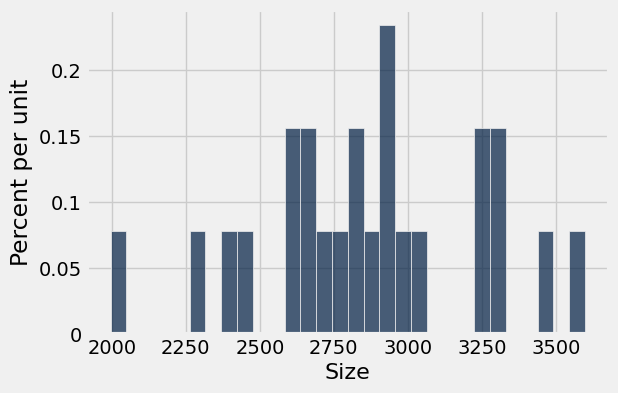

In [35]:
# YOUR CODE HERE
animal_subgroup_hist = animals.where("Subgroup", are.equal_to("Mammals")).hist("Size", bins=30, normed=True)
animal_subgroup_hist


<font color = #d14d0f>**QUESTION 2b**: </font> Suppose we discover a new mammal that was not included in the dataset. The new mammal has a genome size of 1900 kb. Set up a null hypothesis with the goal of determining whether this new species has a significantly smaller genome size than the other mammals in the dataset. 

> Hint: <br> - You may want to review the Data C8 [hypothesis testing guide](https://drive.google.com/file/d/1s9e252XRIUYxNeI8dNG4D0f8B9iwEv6x/view?usp=sharing).

**Null hypothesis:** The genome size of the new mammal species is significantly smaller than the genome size of other mammals in the dataset.

<font color = #d14d0f>**QUESTION 2c**: </font> Now suppose we conduct a hypothesis test and calculate a p-value of 0.08. For this question, our p-value threshold is 0.05. What can we conclude from our results?

> Hint: <br> - You may want to review the Data C8 [hypothesis testing guide](https://drive.google.com/file/d/1s9e252XRIUYxNeI8dNG4D0f8B9iwEv6x/view?usp=sharing).

**ANSWER:** At a 95% significance level, since our p-value  = 0.08 > 0.05, we fail to reject the null hypothesis. There is significant statistical evidence to suggest that the genome size of the new mammal species is significantly smaller than the genome size of other mammals in the dataset.

### Congratulations, you have finished the notebook! ##

If you have any feedback on this assignment, please fill out [this feedback form](https://docs.google.com/forms/d/e/1FAIpQLSdIhvnoIgvOEw5REL3SztFW05I8yHxnv-KzN_xTzjnX4-5FIA/viewform?usp=sf_link).

---